This notebook guides you through the ISLES22 data loading, visualization, and segmentation performance evaluation.

In [1]:
# imports.
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt

In [7]:
# paths.
isles_data_dir = 'dataset_isles22/'
example_case = 1

# Set images path.
dwi_path = os.path.join(isles_data_dir, 'rawdata', 'sub-strokecase{}'.format("%04d" %example_case), 'ses-0001',
                    'sub-strokecase{}_ses-0001_dwi.nii.gz'.format("%04d" % example_case))
adc_path = dwi_path.replace('dwi', 'adc')
flair_path = dwi_path.replace('dwi', 'flair')
mask_path = dwi_path.replace('rawdata', 'derivatives').replace('dwi', 'msk')

In [8]:
# Load image data.
dwi_image = nib.load(dwi_path).get_fdata()
adc_image = nib.load(adc_path).get_fdata()
flair_image = nib.load(flair_path).get_fdata()
mask_image = nib.load(mask_path).get_fdata()

In [9]:
dwi_image.shape
print("DType: dwi: ", dwi_image.dtype, " adc: ", adc_image.dtype, " flair: ", flair_image.dtype, " mask: ", mask_image.dtype)
print("MAX: dwi: ", dwi_image.max(), " adc: ", adc_image.max(), " flair: ", flair_image.max(), " mask: ", mask_image.max())
print("MIN: dwi: ", dwi_image.min(), " adc: ", adc_image.min(), " flair: ", flair_image.min(), " mask: ", mask_image.min())


DType: dwi:  float64  adc:  float64  flair:  float64  mask:  float64
MAX: dwi:  1881.3452233009475  adc:  4.718272735285941  flair:  2207.997802734375  mask:  1.0
MIN: dwi:  -10.159334546391811  adc:  -0.2844416989803731  flair:  0.0  mask:  0.0


In [15]:
print(type(dwi_image))
print(dwi_image.shape)
print(dwi_image[0].shape)


<class 'numpy.ndarray'>
(112, 112, 73)
(112, 73)


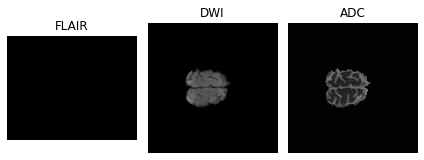

In [29]:
# Lets visualize the MR images with their corresponding mask overlays.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

slice2show=63

# Show FLAIR image.
ax1.imshow(flair_image[:,:,slice2show], cmap='gray')
ax1.set_title('FLAIR')
ax1.set_axis_off()

# Show DWI image w/overlayed mask.
ax2.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax2.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax2.set_title('DWI')
ax2.set_axis_off()

# Show ADC image w/overlayed mask.
ax3.imshow(adc_image[:,:,slice2show], cmap='gray')
ax3.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax3.set_title('ADC')
ax3.set_axis_off()
plt.tight_layout()
plt.show()

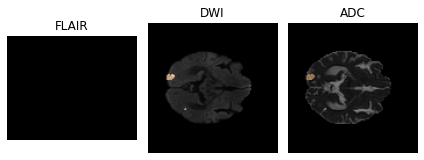

In [22]:
transformed_flair = np.transpose(flair_image, (2, 0, 1))
transformed_adc = np.transpose(adc_image, (2, 0, 1))
transformed_dwi = np.transpose(dwi_image, (2, 0, 1))
transformed_mask = np.transpose(mask_image, (2, 0, 1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

slice2show=30

# Show FLAIR image.
transformed_flair = np.transpose(flair_image, (2, 0, 1))
ax1.imshow(transformed_flair[slice2show], cmap='gray')
ax1.set_title('FLAIR')
ax1.set_axis_off()

# Show DWI image w/overlayed mask.
ax2.imshow(transformed_dwi[slice2show], cmap='gray')
ax2.imshow(transformed_mask[slice2show], alpha=0.5, cmap='copper')
ax2.set_title('DWI')
ax2.set_axis_off()

# Show ADC image w/overlayed mask.
ax3.imshow(transformed_adc[slice2show], cmap='gray')
ax3.imshow(transformed_mask[slice2show], alpha=0.5, cmap='copper')
ax3.set_title('ADC')
ax3.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
def normalize_to_uint8(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)

    normalized_volume = ((volume - min_val) / (max_val - min_val)) * 255
    normalized_volume = normalized_volume.astype(np.uint8)
    return volume

raw_dwi_image = nib.load(dwi_path).get_fdata()
raw_adc_image = nib.load(adc_path).get_fdata()
raw_mask_image = nib.load(mask_path).get_fdata()

transformed_adc = np.transpose(raw_adc_image, (2, 0, 1))
transformed_dwi = np.transpose(raw_dwi_image, (2, 0, 1))
transformed_mask = np.transpose(raw_mask_image, (2, 0, 1))

normalized_adc = normalize_to_uint8(transformed_adc)
normalized_dwi = normalize_to_uint8(transformed_dwi)
normalized_mask = normalize_to_uint8(transformed_mask)


combined_volume = np.stack((normalized_adc, normalized_dwi), axis=-1)


In [11]:
# As an example, we'll segment the DWI using a 99th-percentile intensity cutoff. 
dwi_cutoff = np.percentile(dwi_image[dwi_image>0], 99) 
segmented_image = dwi_image > dwi_cutoff

In [ ]:
import numpy as np

# Assuming you have a list of cases where each case is a dictionary with 'adc_volume' and 'dwi_volume'
# Replace this with your actual data
cases = [
    {'adc_volume': np.random.uniform(-1, 5, size=(73, 113, 113)),
     'dwi_volume': np.random.uniform(-20, 2000, size=(73, 113, 113))},
    # Add more cases here
]

def normalize_to_uint8(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)

    normalized_volume = ((volume - min_val) / (max_val - min_val)) * 255
    normalized_volume = normalized_volume.astype(np.uint8)
    return volume


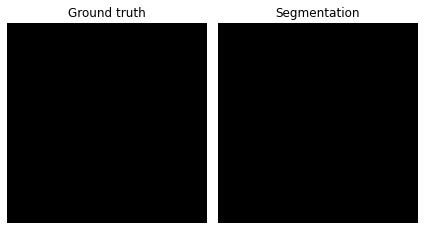

In [12]:
# Lets visualize the segmentation we've created.
# Show ground truth.
fig2, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax1.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax1.set_title('Ground truth')
ax1.set_axis_off()

# Show predicted segmentation.
ax2.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax2.imshow(segmented_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax2.set_title('Segmentation')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

In [32]:
# Compute performance metrics.
# Compute dice
print('Dice score: {}'.format(eval_utils.compute_dice(mask_image, segmented_image)))

# Compute absolute volume difference
voxel_volume = np.prod(nib.load(dwi_path).header.get_zooms())/1000 # Get voxel volume
print('Absolute volume difference: {} ml'.format(eval_utils.compute_absolute_volume_difference(mask_image, segmented_image, voxel_volume)))

# Compute absolute lesion count difference
print('Absolute lesion count difference: {} '.format(eval_utils.compute_absolute_lesion_difference(mask_image, segmented_image)))

# Compute F1-score (lesion-wise)
print('Lesion-wise F1-score: {} '.format(eval_utils.compute_lesion_f1_score(mask_image, segmented_image)))

Dice score: 0.1738013698630137
Absolute volume difference: 10.32 ml
Absolute lesion count difference: 87 
Lesion-wise F1-score: 0.24793388429752067 
